In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, exp, sin, square, cos, log
from dnn_units_copy import *
from minimum_f_copy import *
from scipy import integrate
import copy

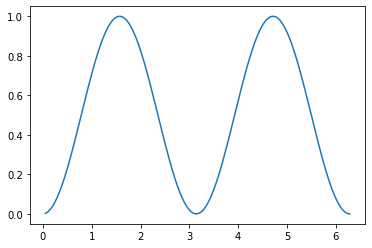

In [2]:
X = np.arange(pi/64, 2*pi + pi/64, pi/64).reshape (1,128)
Y = square(sin(X))
plt.plot(X.T, Y.T)
plt.show()

In [3]:
# initialize_normal = integrate.trapz(Y,X)
# Y = Y / initialize_normal

In [4]:
layers_dims = [X.shape[0], 16, 32, 32, 32, 16, Y.shape[0]]

Cost after iteration 0: 0.801262
Cost after iteration 100: 0.693147
Cost after iteration 200: 0.693147
Cost after iteration 300: 0.693147
Cost after iteration 400: 0.693147
Cost after iteration 500: 0.693147
Cost after iteration 600: 0.693147
Cost after iteration 700: 0.693147
Cost after iteration 800: 0.693147
Cost after iteration 900: 0.693147
Cost after iteration 1000: 0.693147
Cost after iteration 1100: 0.693147
Cost after iteration 1200: 0.693147
Cost after iteration 1300: 0.693147
Cost after iteration 1400: 0.693147
Cost after iteration 1500: 0.693147
Cost after iteration 1600: 0.693147
Cost after iteration 1700: 0.693147
Cost after iteration 1800: 0.693147
Cost after iteration 1900: 0.693147
Cost after iteration 2000: 0.693147
Cost after iteration 2100: 0.693147
Cost after iteration 2200: 0.693147
Cost after iteration 2300: 0.693147
Cost after iteration 2400: 0.693147
Cost after iteration 2500: 0.693147
Cost after iteration 2600: 0.693147
Cost after iteration 2700: 0.693147
Cost

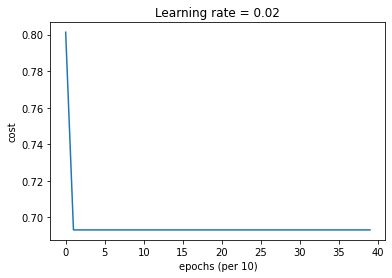

In [5]:
parameters_guess = model_optimize(X, Y, layers_dims, "entropy" ,"adam", learning_rate = 0.02, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 4000, print_cost = True)

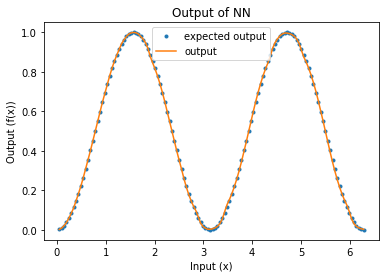

In [6]:
y_predict, caches = L_model_forward(X, parameters_guess)
plt.plot(X.T, Y.T, ".", label= "expected output")
plt.plot(X.T, y_predict.T, label= "output")
plt.xlabel("Input (x)")
plt.ylabel("Output (f(x))")
plt.title("Output of NN")
plt.legend ()
plt.show()

Cost after iteration 0: 11.873190
Cost after iteration 1000: -0.091298
Cost after iteration 2000: -0.097093
Cost after iteration 3000: -0.069679
Cost after iteration 4000: -0.056484
Cost after iteration 5000: -0.048409
Cost after iteration 6000: -0.043069
Cost after iteration 7000: -0.039218
Cost after iteration 8000: -0.036270
Cost after iteration 9000: -0.033884
Cost after iteration 10000: -0.031917
Cost after iteration 11000: -0.030235
Cost after iteration 12000: -0.028778
Cost after iteration 13000: -0.027514
Cost after iteration 14000: -0.026412
Cost after iteration 15000: -0.025421
Cost after iteration 16000: -0.024541
Cost after iteration 17000: -0.023749
Cost after iteration 18000: -0.023028
Cost after iteration 19000: -0.022374


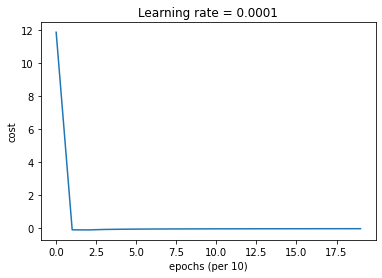

Cost after iteration 0: 13.600248
Cost after iteration 1000: -0.058934
Cost after iteration 2000: -0.088745
Cost after iteration 3000: -0.065785
Cost after iteration 4000: -0.053860
Cost after iteration 5000: -0.046399
Cost after iteration 6000: -0.041440
Cost after iteration 7000: -0.037819
Cost after iteration 8000: -0.035053
Cost after iteration 9000: -0.032792
Cost after iteration 10000: -0.030917
Cost after iteration 11000: -0.029320
Cost after iteration 12000: -0.027939
Cost after iteration 13000: -0.026737
Cost after iteration 14000: -0.025681
Cost after iteration 15000: -0.024736
Cost after iteration 16000: -0.023896
Cost after iteration 17000: -0.023136
Cost after iteration 18000: -0.022444
Cost after iteration 19000: -0.021816


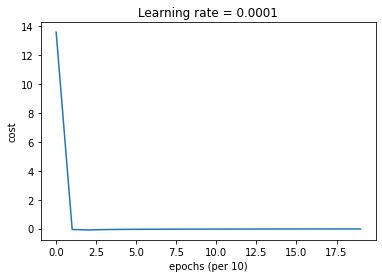

Cost after iteration 0: 15.277842
Cost after iteration 1000: -0.028607
Cost after iteration 2000: -0.080823
Cost after iteration 3000: -0.062095
Cost after iteration 4000: -0.051305
Cost after iteration 5000: -0.044426
Cost after iteration 6000: -0.039809
Cost after iteration 7000: -0.036403
Cost after iteration 8000: -0.033806
Cost after iteration 9000: -0.031668
Cost after iteration 10000: -0.029887
Cost after iteration 11000: -0.028370
Cost after iteration 12000: -0.027048
Cost after iteration 13000: -0.025902
Cost after iteration 14000: -0.024890
Cost after iteration 15000: -0.023987
Cost after iteration 16000: -0.023185
Cost after iteration 17000: -0.022455
Cost after iteration 18000: -0.021796
Cost after iteration 19000: -0.021195


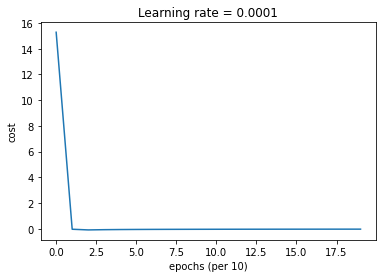

Cost after iteration 0: 16.916418
Cost after iteration 1000: -0.000607
Cost after iteration 2000: -0.073161
Cost after iteration 3000: -0.058633
Cost after iteration 4000: -0.048967
Cost after iteration 5000: -0.042647
Cost after iteration 6000: -0.038355
Cost after iteration 7000: -0.035150
Cost after iteration 8000: -0.032694
Cost after iteration 9000: -0.030677
Cost after iteration 10000: -0.028980
Cost after iteration 11000: -0.027532
Cost after iteration 12000: -0.026267
Cost after iteration 13000: -0.025173
Cost after iteration 14000: -0.024201
Cost after iteration 15000: -0.023337
Cost after iteration 16000: -0.022566
Cost after iteration 17000: -0.021867
Cost after iteration 18000: -0.021234
Cost after iteration 19000: -0.020656


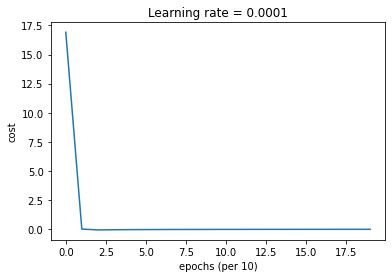

In [8]:
rho_list = [3.5, 4, 4.5, 5]
output = {}
i = 0
for rho in rho_list:
    parameters = model_optimize_free_e (X, rho, matrix, parameters_guess, layers_dims, "adam", learning_rate = 0.0001, beta = 0.9, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, num_epochs = 20000, print_cost = True)
    output['rho'+ str(i)], caches = L_model_forward(X, parameters)
    normal_factor = 1/rho
    output['rho'+ str(i)] = output['rho'+ str(i)] * (normal_factor/integrate.trapz(output['rho'+ str(i)],X))
    i+=1

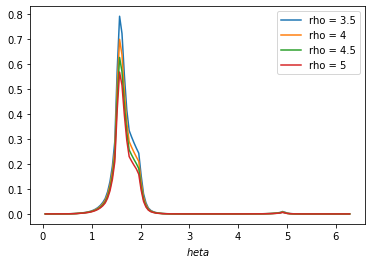

In [10]:
i = 0
for rho in rho_list:
    plt.plot(X.T, output['rho'+ str(i)].T, label= "rho = {}".format(rho) )
    i+= 1
plt.legend(loc= "best")
plt.xlabel("$\theta$")
plt.show()

Cost after iteration 0: 459442.825511
Cost after iteration 10: 0.131809
Cost after iteration 20: -0.000072
Cost after iteration 30: -0.000001
Cost after iteration 40: -0.000000
Cost after iteration 50: -0.000000
Cost after iteration 60: -0.000000
Cost after iteration 70: -0.000000
Cost after iteration 80: -0.000000
Cost after iteration 90: -0.000000
Cost after iteration 100: -0.000000
Cost after iteration 110: -0.000000
Cost after iteration 120: -0.000000
Cost after iteration 130: -0.000000
Cost after iteration 140: -0.000000
Cost after iteration 150: -0.000000
Cost after iteration 160: -0.000000
Cost after iteration 170: -0.000000
Cost after iteration 180: -0.000000
Cost after iteration 190: -0.000000
Cost after iteration 200: -0.000000
Cost after iteration 210: -0.000000
Cost after iteration 220: -0.000000
Cost after iteration 230: -0.000000
Cost after iteration 240: -0.000000
Cost after iteration 250: -0.000000
Cost after iteration 260: -0.000000
Cost after iteration 270: -0.000000


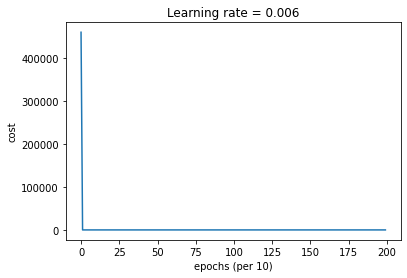

Cost after iteration 0: 384643.843720
Cost after iteration 10: 0.000470
Cost after iteration 20: -0.000000
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan
Cost after iteration 100: nan
Cost after iteration 110: nan
Cost after iteration 120: nan
Cost after iteration 130: nan
Cost after iteration 140: nan
Cost after iteration 150: nan
Cost after iteration 160: nan
Cost after iteration 170: nan
Cost after iteration 180: nan
Cost after iteration 190: nan
Cost after iteration 200: nan
Cost after iteration 210: nan
Cost after iteration 220: nan
Cost after iteration 230: nan
Cost after iteration 240: nan
Cost after iteration 250: nan
Cost after iteration 260: nan
Cost after iteration 270: nan
Cost after iteration 280: nan
Cost after iteration 290: nan
Cost after iteration 300: nan
Cost after iteration 310: nan
Cost after iteration 320: nan


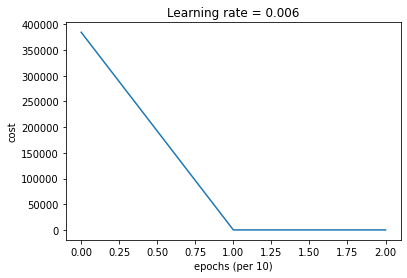

Cost after iteration 0: 578736.431067
Cost after iteration 10: 0.398925
Cost after iteration 20: -0.000351
Cost after iteration 30: -0.000016
Cost after iteration 40: -0.000003
Cost after iteration 50: -0.000002
Cost after iteration 60: -0.000001
Cost after iteration 70: -0.000001
Cost after iteration 80: -0.000001
Cost after iteration 90: -0.000001
Cost after iteration 100: -0.000001
Cost after iteration 110: -0.000001
Cost after iteration 120: -0.000001
Cost after iteration 130: -0.000001
Cost after iteration 140: -0.000001
Cost after iteration 150: -0.000001
Cost after iteration 160: -0.000001
Cost after iteration 170: -0.000001
Cost after iteration 180: -0.000001
Cost after iteration 190: -0.000001
Cost after iteration 200: -0.000001
Cost after iteration 210: -0.000001
Cost after iteration 220: -0.000001
Cost after iteration 230: -0.000001
Cost after iteration 240: -0.000001
Cost after iteration 250: -0.000001
Cost after iteration 260: -0.000001
Cost after iteration 270: -0.000001


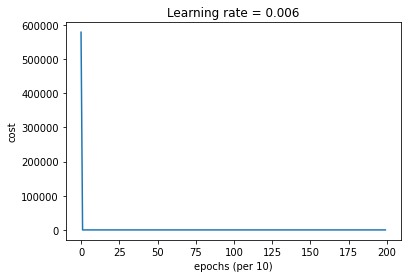

Cost after iteration 0: 558531.891225
Cost after iteration 10: 0.158882
Cost after iteration 20: -0.000016
Cost after iteration 30: -0.000000
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan
Cost after iteration 100: nan
Cost after iteration 110: nan
Cost after iteration 120: nan
Cost after iteration 130: nan
Cost after iteration 140: nan
Cost after iteration 150: nan
Cost after iteration 160: nan
Cost after iteration 170: nan
Cost after iteration 180: nan
Cost after iteration 190: nan
Cost after iteration 200: nan
Cost after iteration 210: nan
Cost after iteration 220: nan
Cost after iteration 230: nan
Cost after iteration 240: nan
Cost after iteration 250: nan
Cost after iteration 260: nan
Cost after iteration 270: nan
Cost after iteration 280: nan
Cost after iteration 290: nan
Cost after iteration 300: nan
Cost after iteration 310: nan
Cost after iteration 320

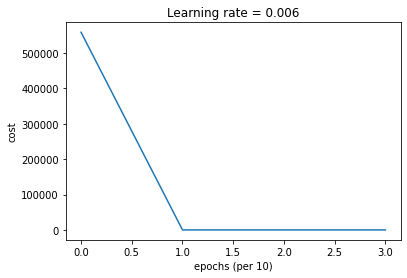

In [15]:
rho_list = [3.5, 4, 4.5, 5]
output = {}
i = 0
for rho in rho_list:
    parameters = model_optimize_free_e_without_guess (X, rho, matrix, layers_dims, "adam", learning_rate = 0.006, beta = 0.9, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 2000, print_cost = True)
    output['rho'+ str(i)], caches = L_model_forward(X, parameters)
    normal_factor = 1/rho
    output['rho'+ str(i)] = output['rho'+ str(i)] * (normal_factor/integrate.trapz(output['rho'+ str(i)],X))
    i+=1

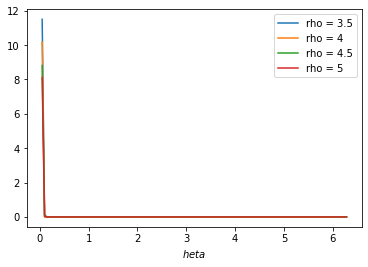

In [16]:
i= 0 
for rho in rho_list:
    plt.plot(X.T, output['rho'+ str(i)].T, label= "rho = {}".format(rho) )
    i+= 1
plt.legend(loc= "best")
plt.xlabel("$\theta$")
plt.show()

In [19]:
dx = pi/50
x = np.arange (0, 2*pi, dx)
y = sin(x)**2

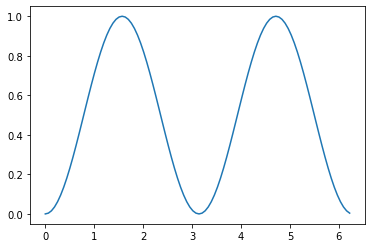

In [20]:
plt.plot(x,y)

In [21]:
I = integrate.trapz(y,x)
I

3.1414687916076836

In [24]:
(np.sum(y*dx)-1)**2

4.58641909390977